In [3]:
import shapely
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

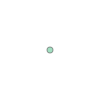

In [4]:
Point(0,0)

In [5]:
a = Point(0, 0)
b = Point(1, 0)
a.distance (b)

1.0

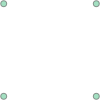

In [6]:
MultiPoint([(0,0), (0,1), (1,1), (1,0)])

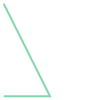

In [7]:
line = LineString([(0,0), (1,0), (0,2)])
line

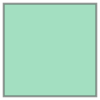

In [8]:
pol = Polygon ([(0,0), (0,1), (1,1), (1,0)])
pol


In [9]:
pol.area

1.0

In [10]:
!pip install rasterio


In [11]:
!pip install contextily

In [12]:
import contextily as ctx

In [18]:
df = pd.read_csv('Deaths_df.csv')
df.head()

,id,Count,geometry
0,1,3,POINT (24.348178 113.151358)
1,2,2,POINT (29.586414 110.046252)
2,3,5,POINT (9.3226016 13.393389)
3,4,3,POINT (47.2550409 -1.5401497)
4,5,2,POINT (24.625561 118.431541)


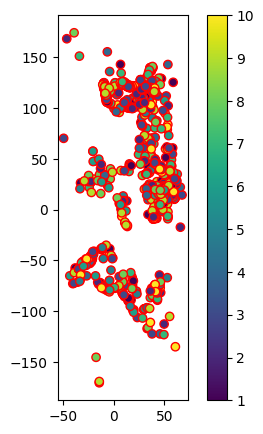

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Convert the DataFrame to a GeoDataFrame, assuming the 'geometry' column exists
# If 'geometry' is stored in WKT format, we need to convert it properly
df['geometry'] = gpd.GeoSeries.from_wkt(df['geometry'])

# Now create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Plotting the GeoDataFrame
ax = gdf.plot(column='Count', figsize=(5, 5), alpha=1.0, edgecolor='r', legend=True)


plt.show()


In [22]:
pumps_df = gpd.read_file('pump.csv')
pumps_df.head()

,id,geometry
0,1,POINT (24.348178 113.151358)
1,2,POINT (29.586414 110.046252)
2,3,POINT (9.3226016 13.393389)
3,4,POINT (47.2550409 -1.5401497)
4,5,POINT (24.625561 118.431541)


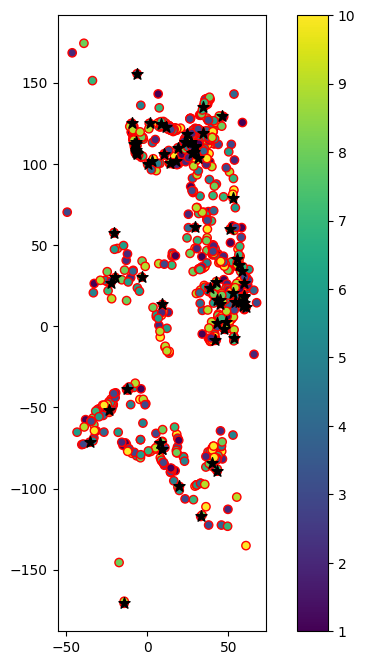

In [51]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the Deaths DataFrame
deaths_df = pd.read_csv('Deaths_df.csv')

# Convert the 'geometry' column to geometries (assuming WKT format)
deaths_df['geometry'] = gpd.GeoSeries.from_wkt(deaths_df['geometry'])

# Convert to a GeoDataFrame
deaths_gdf = gpd.GeoDataFrame(deaths_df, geometry='geometry')

# Load the Pumps DataFrame (assuming a similar structure with a geometry column)
pumps_df = pd.read_csv('pump.csv')

# Convert the 'geometry' column in pumps_df to geometries
pumps_df['geometry'] = gpd.GeoSeries.from_wkt(pumps_df['geometry'])

# Convert to a GeoDataFrame
pumps_gdf = gpd.GeoDataFrame(pumps_df, geometry='geometry')

# Plot the deaths GeoDataFrame
ax = deaths_gdf.plot(column='Count', figsize=(8, 8), alpha=1.0, edgecolor='r', legend=True)

# Plot the pumps GeoDataFrame on the same axis with markers
pumps_gdf.plot(ax=ax, marker='*', color='Black', markersize=70)


# Show the plot
plt.show()
